### Введение.

Необходимо помочь маркетологам оптимизировать маркетинговые затраты. В распоряжении данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши;
- выгрузка всех заказов за этот период;
- статистика рекламных расходов;

Описание данных:

Таблица `visits`:
- `Uid` — уникальный идентификатор пользователя;
- `Device` — категория устройства пользователя;
- `Start Ts` — дата и время начала сессии;
- `End Ts` — дата и время окончания сессии;
- `Source Id` — идентификатор рекламного источника, из которого пришел пользователь;

Таблица `orders`:
- `Uid` — уникальный id пользователя, который сделал заказ;
- `Buy Ts` — дата и время заказа;
- `Revenue` — выручка Яндекс.Афиши с этого заказа;

Таблица `costs`:

- `source_id` — идентификатор рекламного источника;
- `dt` — дата;
- `costs` — затраты на этот рекламный источник в этот день;




### Шаг 1. Изучение общей информации о данных. Подготовка данных.

Импорт библиотек и данных, вывод общей информации о таблицах.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import requests
from io import BytesIO

import warnings

warnings.filterwarnings('ignore')  

In [2]:
# функция чтения данных из google sheets
def data_from_g_sheets(spreadsheet_id):
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    return pd.read_csv(BytesIO(r.content))

In [3]:
try:
    
    visits = pd.read_csv('/datasets/visits_log.csv')
    orders = pd.read_csv('/datasets/orders_log.csv')
    costs = pd.read_csv('/datasets/costs.csv')
    
except:
    
    visits = data_from_g_sheets('1SGyza7nCK4oOMtg--LmUReS2gOKbTygzg7NRHDFxZ4Q')
    orders = data_from_g_sheets('1Bk8Z4rlcogF3b6V3h67z7BtTwljfMM1bHfd6-GH7SsI')
    costs = data_from_g_sheets('1OdTvMSJ8mWPgO4vTHL3CyvlRW3CYSSFPdSa45GoRWuY')

##### Таблица `visits`:

In [4]:
display(visits.info())
display(visits.head(10))
print('Количество дубликатов в таблице visits:', visits.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


Количество дубликатов в таблице visits: 0


In [5]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')

##### Таблица `orders`:

In [6]:
display(orders.info())
display(orders.head(10))
print('Количество дубликатов в таблице orders:', orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


Количество дубликатов в таблице orders: 0


In [7]:
orders.columns = ['buy_ts', 'revenue', 'uid']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d %H:%M:%S')

##### Таблица `costs`:

In [8]:
display(costs.info())
display(costs.head(10))
print('Количество дубликатов в таблице costs:', costs.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


Количество дубликатов в таблице costs: 0


In [9]:
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')

### Изучение общей информации о данных. Подготовка данных. Вывод:

- в таблице `visits` дубликаты отсутствуют, внадписи в названиях столбцов заменены с верхнего регистра на нижний и заменен пробел знаком _. Столбцы `end_ts` и `start_ts` приведены к типу `datetime`;

- в таблице `orders` дубликаты отсутствуют, надписи в названиях столбцов заменены с верхнего регистра на нижний и заменен пробел знаком _. Столбец `buy_ts` приведен к типу `datetime`

- в таблице `costs` дубликаты отсутствуют, столбец `dt` приведен к типу `datetime`

### Шаг 2. Метрики.

#### Шаг 2.1. Продукт.

Сколько людей пользуются в день, неделю, месяц?


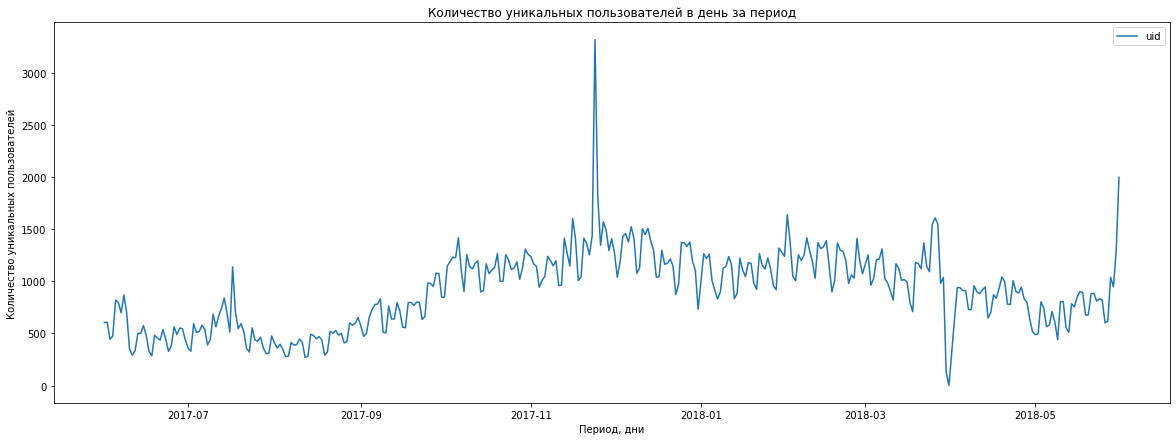

Среднее количество уникальных пользователей в день: 908


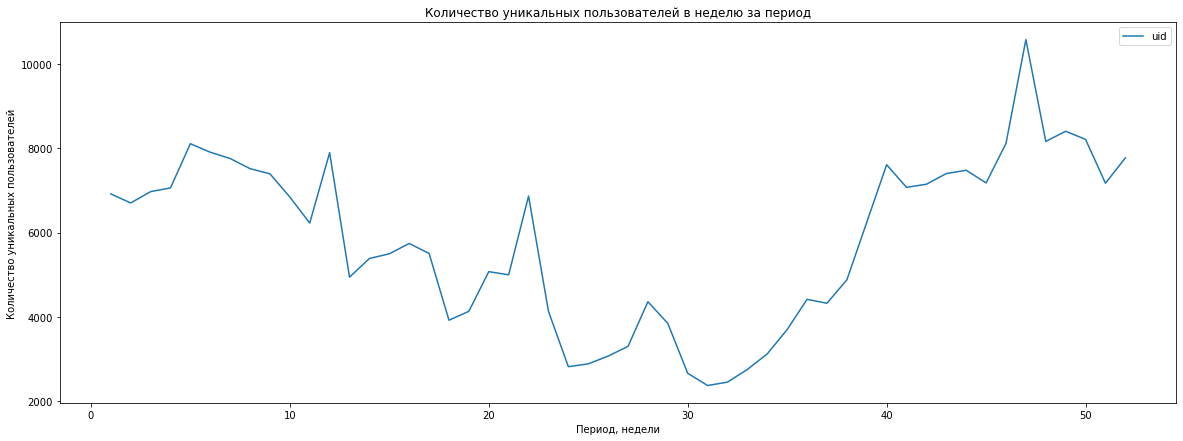

Среднее количество уникальных пользователей в неделю: 5825


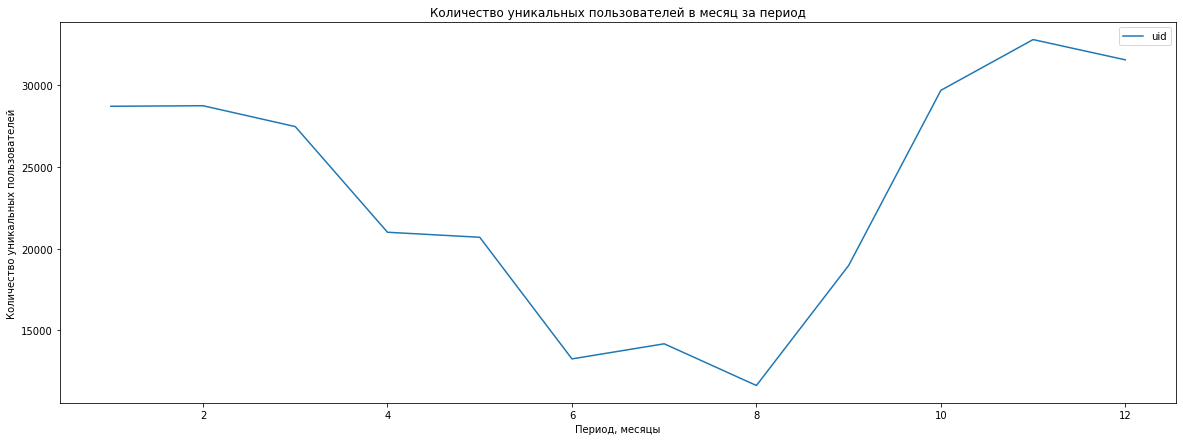

Среднее количество уникальных пользователей в месяц: 23228


In [10]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

dau_total = visits.groupby('session_date').agg({'uid' : 'nunique'}).mean()
dau_in_dynamics = visits.groupby('session_date').agg({'uid' : 'nunique'}).reset_index()
dau_in_dynamics.plot(figsize = (20, 7), x = 'session_date', y = 'uid')
plt.title('Количество уникальных пользователей в день за период')
plt.xlabel('Период, дни')
plt.ylabel('Количество уникальных пользователей')
plt.show()
print('Среднее количество уникальных пользователей в день:', int(dau_total[0].round()))

wau_total = visits.groupby('session_week').agg({'uid' : 'nunique'}).mean()
wau_in_dynamics = visits.groupby('session_week').agg({'uid' : 'nunique'}).reset_index()
wau_in_dynamics.plot(figsize = (20, 7), x = 'session_week', y = 'uid')
plt.title('Количество уникальных пользователей в неделю за период')
plt.xlabel('Период, недели')
plt.ylabel('Количество уникальных пользователей')
plt.show()
print('Среднее количество уникальных пользователей в неделю:', int(wau_total[0].round()))

mau_total = visits.groupby('session_month').agg({'uid' : 'nunique'}).mean()
mau_in_dynamics = visits.groupby('session_month').agg({'uid' : 'nunique'}).reset_index()
mau_in_dynamics.plot(figsize = (20, 7), x = 'session_month', y = 'uid')
plt.title('Количество уникальных пользователей в месяц за период')
plt.xlabel('Период, месяцы')
plt.ylabel('Количество уникальных пользователей')
plt.show()
print('Среднее количество уникальных пользователей в месяц:', int(mau_total[0].round()))

Сколько сессий в день?

In [11]:
sessions_per_day = visits.groupby('session_date').agg({'uid' : ['count','nunique']})
sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['sessions_per_user'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']
print('Среднее количество сессий в день:', int(sessions_per_day.mean()[0].round()))
print('Среднее количество сессий в день одного пользователя:', sessions_per_day.mean()[2].round(2))

Среднее количество сессий в день: 987
Среднее количество сессий в день одного пользователя: 1.08


Сколько длится одна сессия? Средняя продолжительность сессии

Средняя продолжительность одной сессии: 10 минут
Медианное продолжительность одной сессии: 5 минут
Наиболее частое время продолжительности сессии (мода): 60 секунд


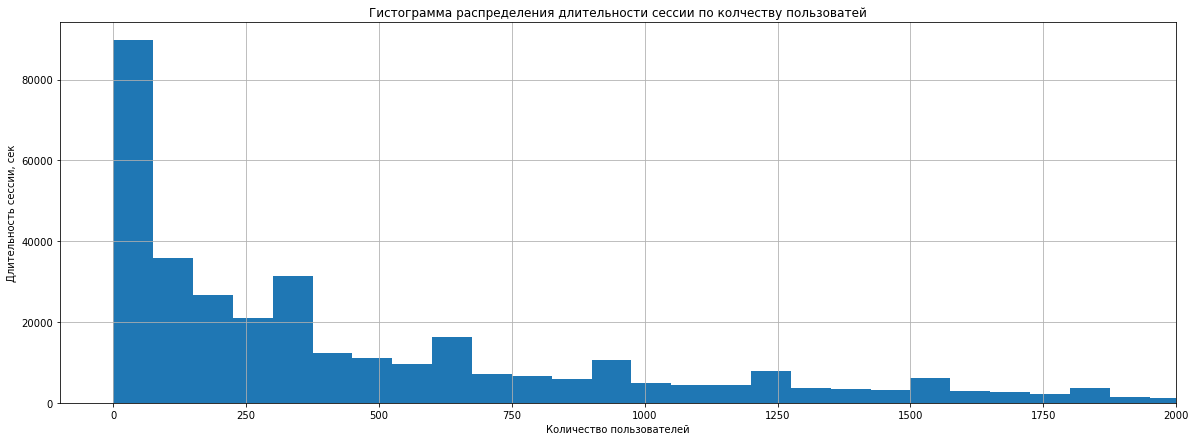

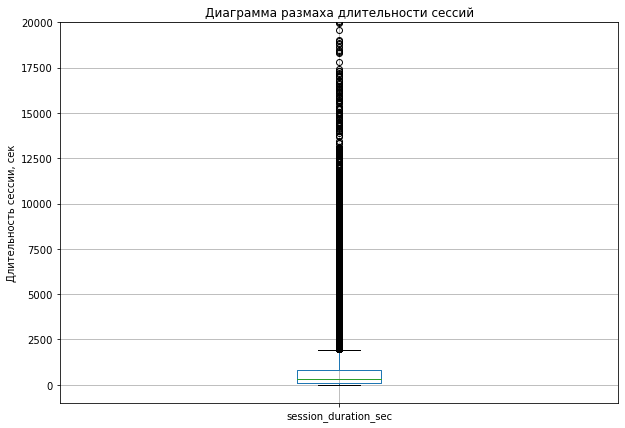

In [12]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
asl_mean = visits['session_duration_sec'].mean()
print('Средняя продолжительность одной сессии:', int(asl_mean / 60), 'минут')
asl_median = visits['session_duration_sec'].median()
print('Медианное продолжительность одной сессии:', int(asl_median / 60), 'минут')
asl_mode = visits['session_duration_sec'].mode()
print('Наиболее частое время продолжительности сессии (мода):', asl_mode[0], 'секунд')

visits['session_duration_sec'].hist(bins = 100, figsize = (20, 7), range = (0, 7500))
plt.xlim(-100, 2000)
plt.title('Гистограмма распределения длительности сессии по колчеству пользоватей')
plt.xlabel('Количество пользователей')
plt.ylabel('Длительность сессии, сек')
plt.show()

visits.boxplot('session_duration_sec', figsize = (10, 7))
plt.ylim(-1000, 20000)
plt.title('Диаграмма размаха длительности сессий')
plt.ylabel('Длительность сессии, сек')
plt.show()


Как часто люди возвращаются? Удержание.

<AxesSubplot:title={'center':'Cohorts : User Retention'}, xlabel='cohort_lifetime', ylabel='first_session_month'>

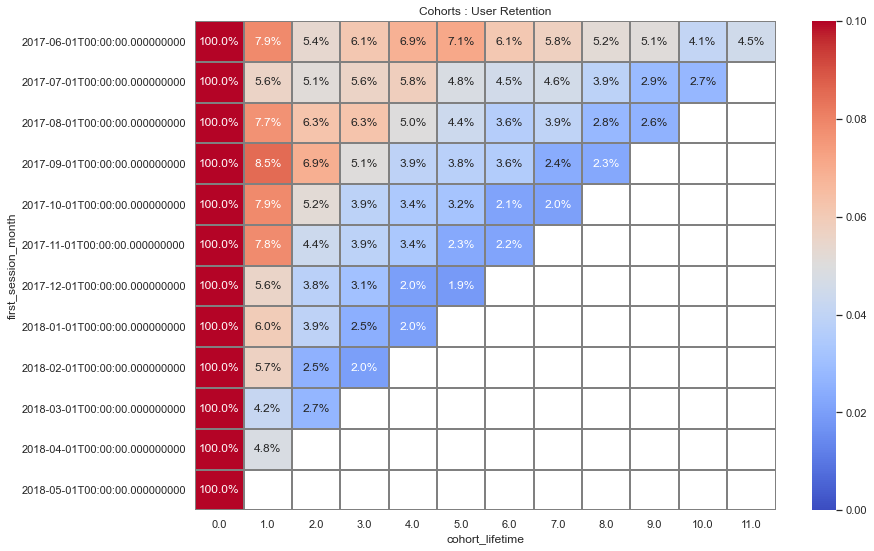

In [13]:
first_activity_date = visits.groupby('uid')['start_ts'].min()
first_activity_date.name = 'first_activity_date'
retention_rate = pd.merge(visits, first_activity_date, on = 'uid')
retention_rate['first_session_month'] = retention_rate['first_activity_date'].astype('datetime64[M]')
retention_rate['session_month'] = retention_rate['session_date'].astype('datetime64[M]')
retention_rate['cohort_lifetime'] = retention_rate['session_month'] - retention_rate['first_session_month']
retention_rate['cohort_lifetime'] = retention_rate['cohort_lifetime'] / np.timedelta64(1, 'M')
retention_rate['cohort_lifetime'] = retention_rate['cohort_lifetime'].round()
cohorts = retention_rate.groupby(['first_session_month', 'cohort_lifetime']).agg({'uid' : 'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month', 'uid']] 
initial_users_count = initial_users_count.rename(columns = {'uid' : 'cohort_users'}) 
cohorts = pd.merge(cohorts, initial_users_count, on = 'first_session_month') 
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] 
retention_pivot = cohorts.pivot_table(index = 'first_session_month', 
                                      columns = 'cohort_lifetime', 
                                      values = 'retention', 
                                      aggfunc = 'sum')
sns.set(style = 'white')
plt.figure(figsize = (13, 9))
plt.title('Cohorts : User Retention')
sns.heatmap(retention_pivot, annot = True, fmt = '.1%', 
            linewidths = 1, linecolor = 'gray', 
            cmap = 'coolwarm', vmin = 0, vmax = 0.1,)

#### Шаг 2.1. Продукт. Вывод.

Итого:

- Количество уникальных пользователей в день: 908
- Количество уникальных пользователей в неделю: 5825
- Количество уникальных пользователей в месяц: 23228
- Среднее количество сессий в день: 987
- Среднее количество сессий в день одного пользователя: 1.08
- Средняя продолжительность одной сессии: 10 минут
- Медианное продолжительность одной сессии: 5 минут
- Наиболее частое время продолжительности сессии (мода): 60 секунд

Как часто люди возвращаются? Удержание.

От 95,8% до 91,5% не возврвщаются.

#### Шаг 2.2. Продажи.

Когда люди начинают покупать?

count    36523.000000
mean       249.164691
std        429.742785
min          0.000000
25%          4.000000
50%         16.000000
75%        252.000000
max       1439.000000
Name: buying_time, dtype: float64

Наиболее частое время от первого визита до покупки: 1 минута


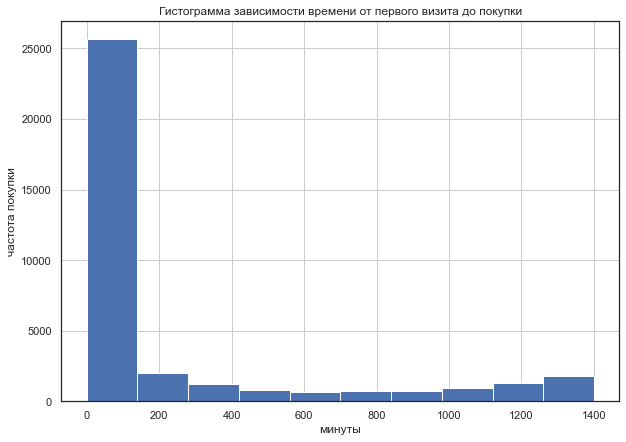

In [14]:
first_visit = visits.groupby('uid').agg({'start_ts' : 'min'})
first_visit = first_visit.rename(columns = {'start_ts' : 'first_visit_date'}).reset_index()
first_order = orders.groupby('uid').agg({'buy_ts' : 'min'})
first_order = first_order.rename(columns = {'buy_ts' : 'first_purchase_date'}).reset_index()

buying_time = pd.merge(first_visit, first_order, on = 'uid')
buying_time['buying_time'] = (buying_time['first_purchase_date'] - buying_time['first_visit_date']).dt.seconds / 60
display(buying_time['buying_time'].describe())
print('Наиболее частое время от первого визита до покупки:', int(buying_time['buying_time'].mode()[0]), 'минута')

buying_time['buying_time'].hist(figsize = (10, 7), range = (0, 1400))

plt.title('Гистограмма зависимости времени от первого визита до покупки')
plt.xlabel('минуты')
plt.ylabel('частота покупки')
plt.show()

Сколько раз покупают за период?

In [15]:
orders_first_visit = pd.merge(orders, first_visit)

orders_first_visit['purchase_date'] = orders_first_visit['buy_ts'].dt.date
orders_first_visit['purchases_week'] = orders_first_visit['buy_ts'].dt.week
orders_first_visit['purchase_month'] = orders_first_visit['buy_ts'].dt.month

purchases_per_day = orders_first_visit.groupby('purchase_date')['uid'].count()
purchases_per_week = orders_first_visit.groupby('purchases_week')['uid'].count()
purchases_per_month = orders_first_visit.groupby('purchase_month')['uid'].count()

orders_count = pd.DataFrame()

orders_count['per_day'] = purchases_per_day.describe().round()
orders_count['per_week'] = purchases_per_week.describe().round()
orders_count['per_month'] = purchases_per_month.describe().round()
orders_count.head(10)


,per_day,per_week,per_month
count,364.0,52.0,12.0
mean,139.0,970.0,4201.0
std,77.0,398.0,1512.0
min,1.0,314.0,1807.0
25%,83.0,658.0,3046.0
50%,136.0,998.0,4534.0
75%,177.0,1270.0,5409.0
max,814.0,1894.0,6218.0


Какой средний чек?

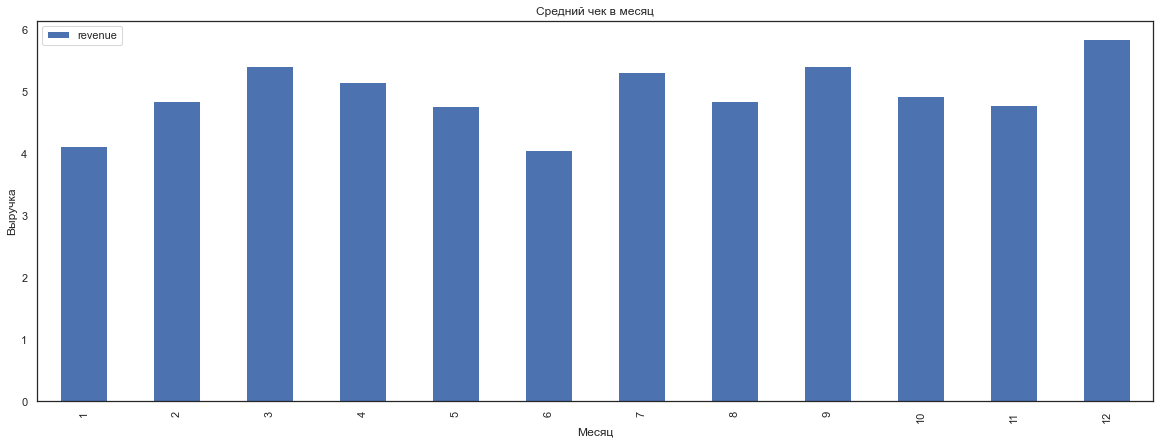

In [16]:
mean_check = orders_first_visit.groupby('purchase_month').agg({'revenue': 'mean'})
mean_check.plot(kind = 'bar', figsize = (20, 7))
plt.title('Средний чек в месяц')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

Сколько денег приносят? (LTV)

In [17]:
sources = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'})

payers = orders.groupby('uid').agg({'buy_ts': 'min'}).merge(sources, on = 'uid').reset_index()
payers = payers.rename(columns = {'buy_ts': 'first_buy'})

ltv = payers.merge(orders, on = 'uid')
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1,'M')).round().astype(int)

orders_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'count').fillna(0)
buyers_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'uid', aggfunc = 'nunique').fillna(0)

ltv = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'sum').fillna(0)
ltv = ltv.cumsum(axis = 1)

cohort_sizes = payers.groupby('source_id').agg({'uid': 'nunique'}).rename(columns = {'uid': 'cohort_size'})

ltv = ltv.merge(cohort_sizes, on = 'source_id')
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = 'cohort_size')
display(ltv)




,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,6.156185,7.150835,7.891156,8.537754,9.029303,9.251083,9.525826,9.866858,10.191256,10.450862,10.557561,10.673508,10.724577
2,6.770593,8.054740,9.717921,11.253637,11.900125,12.484390,12.721418,12.948380,13.171358,13.233560,13.346994,13.380422,13.383802
3,4.477694,4.729283,4.865748,5.008149,5.083093,5.122590,5.147003,5.173669,5.192354,5.197477,5.202699,5.203834,5.204931
4,4.584762,4.738128,4.852278,4.948617,5.068362,5.226563,5.342363,5.391025,5.410340,5.448244,5.502627,5.505380,5.506685
5,4.909883,5.114191,5.469974,6.836748,7.072747,7.246335,7.365203,7.454998,7.515129,7.576270,7.582746,7.592303,7.592558
7,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000
9,3.880901,4.167390,4.408024,4.678888,4.788189,4.935588,5.059127,5.126608,5.244430,5.284972,5.293566,5.293566,5.293566
10,3.164131,3.227434,3.254695,3.302558,3.316576,3.319217,3.332724,3.343348,3.346102,3.348631,3.348631,3.348631,3.348631


#### Шаг 2.2. Продажи. Вывод.

Люди начинают покупать в среднем через 249 минут от первого визита. Наиболее частое время от первого визита до покупки составляет 1 минута.

В среднем, покупают за период:
- в день - 139;
- в неделю - 970;
- в месяц - 4201;

ltv:

Рекламный источник №2 лидер по итоговой сумме денег, которую один клиент принес в среднем со всех своих покупок за период.

#### Шаг 2.3. Маркетинг.

Сколько денег потратили? Всего / на каждый источник / по времени

Всего потратили денег: 329131.62

Расходы на каждый источник:


,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


Месячные расходы:


,costs_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


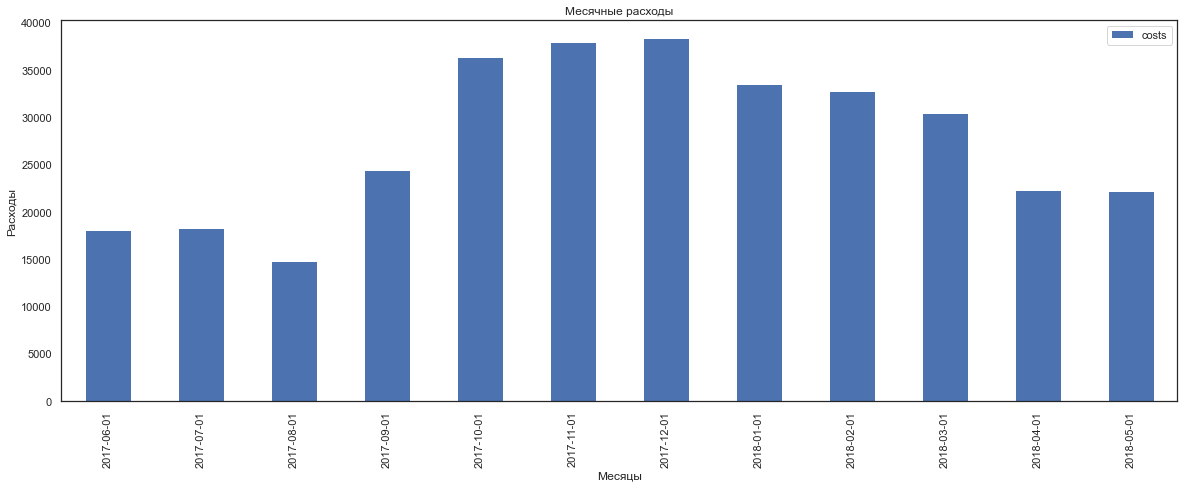

In [18]:
print('Всего потратили денег:', costs['costs'].sum())
print()

costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
print('Расходы на каждый источник:')
display(costs_by_source.sort_values('costs', ascending = False))

costs['costs_month'] = costs['dt'].astype('datetime64[M]').dt.date
costs_by_month = costs.groupby('costs_month')['costs'].sum().reset_index()
print('Месячные расходы:')
display(costs_by_month)

costs_by_month.plot(kind = 'bar', figsize = (20, 7), x = 'costs_month')
plt.title('Месячные расходы')
plt.xlabel('Месяцы')
plt.ylabel('Расходы')
plt.show()

Сколько стоило привлечение одного покупателя из каждого источника? (CAC)

Привлечение одного покупателя из каждого источника:


,costs,cohort_size,cac
source_id,,,
1,20833.27,2899,7.186364
2,42806.04,3506,12.209367
3,141321.63,10473,13.493901
4,61073.60,10296,5.931779
5,51757.10,6931,7.467479
9,5517.49,1088,5.071222
10,5822.49,1329,4.381106


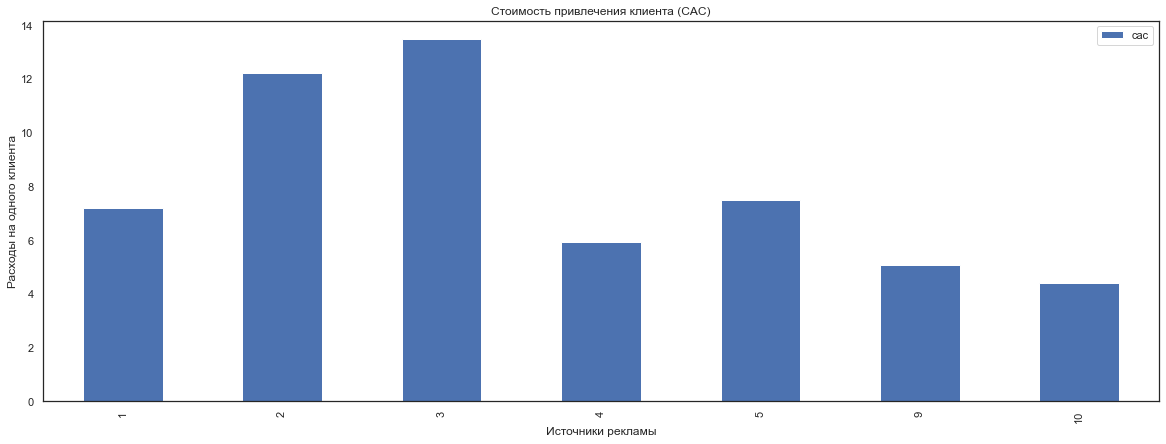

In [19]:
cac = costs.groupby('source_id').agg({'costs' : 'sum'}).merge(cohort_sizes, on = 'source_id')
cac['cac'] = (cac['costs'] / cac['cohort_size'])
cac_hist = cac.reset_index()
print('Привлечение одного покупателя из каждого источника:')
display(cac)#.sort_values('cac', ascending = False))

cac_hist.plot(kind = 'bar', figsize = (20, 7), x = 'source_id', y = 'cac')
plt.title('Стоимость привлечения клиента (CAC)')
plt.xlabel('Источники рекламы')
plt.ylabel('Расходы на одного клиента')
plt.show()

На сколько окупились расходы? (ROI)

,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,0.856648,0.995056,1.098073,1.188049,1.256449,1.287311,1.325542,1.372997,1.418138,1.454263,1.469110,1.485245,1.492351
2,0.554541,0.659718,0.795940,0.921722,0.974672,1.022526,1.041939,1.060528,1.078791,1.083886,1.093177,1.095915,1.096191
3,0.331831,0.350476,0.360589,0.371142,0.376696,0.379623,0.381432,0.383408,0.384793,0.385172,0.385559,0.385643,0.385725
4,0.772915,0.798770,0.818014,0.834255,0.854442,0.881112,0.900634,0.908838,0.912094,0.918484,0.927652,0.928116,0.928336
5,0.657502,0.684862,0.732506,0.915536,0.947140,0.970386,0.986304,0.998329,1.006381,1.014569,1.015436,1.016716,1.016750
9,0.765279,0.821772,0.869223,0.922635,0.944188,0.973254,0.997615,1.010922,1.034155,1.042150,1.043844,1.043844,1.043844
10,0.722222,0.736671,0.742894,0.753818,0.757018,0.757621,0.760704,0.763129,0.763757,0.764335,0.764335,0.764335,0.764335


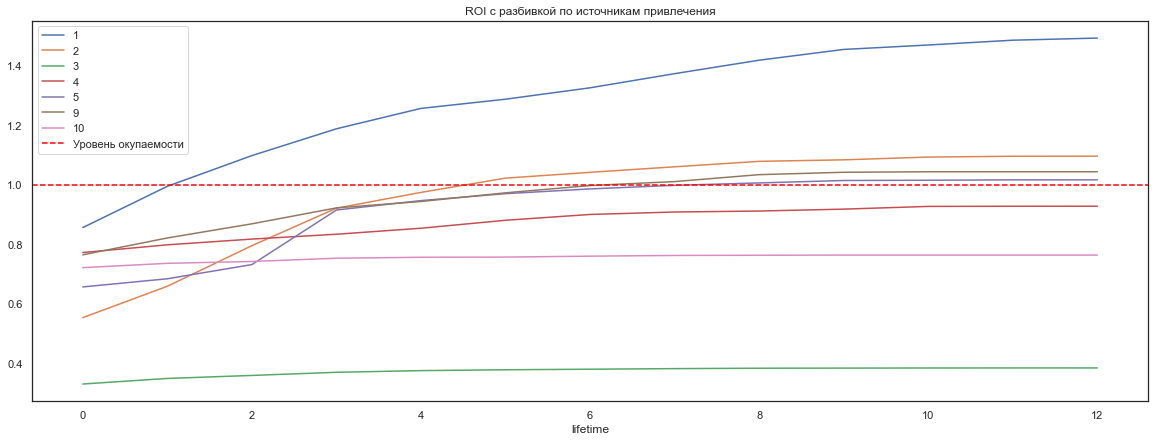

In [20]:
roi = pd.merge(ltv, cac[['cac']], on = 'source_id')
roi = roi.div(roi['cac'], axis = 0).drop(columns = 'cac')
display(roi)

roi.T.plot(figsize = (20, 7))
plt.axhline(y = 1, label = 'Уровень окупаемости', color = 'red', linestyle = '--')
plt.title('ROI с разбивкой по источникам привлечения')
plt.xlabel('lifetime')
plt.legend()
plt.show()

Выручка по источнику и устройству

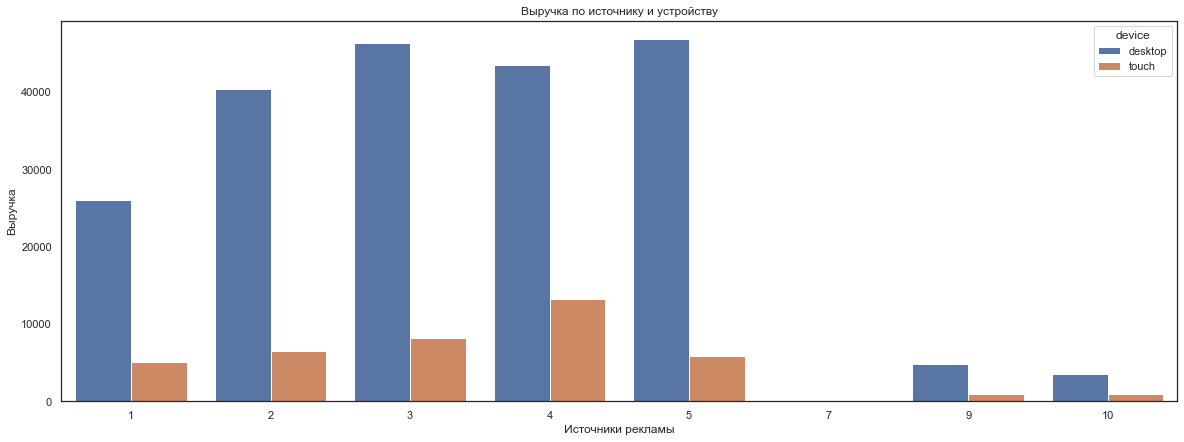

In [21]:
visits_first_activity_date = retention_rate.query('start_ts == first_activity_date')
revenue_source_and_device = (pd.merge(orders, visits_first_activity_date, on = 'uid', how = 'inner'))\
                                .groupby(['source_id', 'device']).agg({'revenue' : 'sum'})
revenue_source_and_device = revenue_source_and_device.reset_index()

plt.figure(figsize = (20, 7))
sns.barplot(x = "source_id", y = "revenue", hue = "device", data = revenue_source_and_device)
plt.title('Выручка по источнику и устройству')
plt.xlabel('Источники рекламы')
plt.ylabel('Выручка')
plt.show()

#### Шаг 2.3. Маркетинг. Вывод.

- Всего на привлечение клиентов потратили денег: 329131.62;
- Больше всего потратили на источник рекламы №3: 141321.63;
- Самые затратные месяцы: октбрь - 2017; ноябрь - 2017 и декабрь - 2017;
- Самым затратным источником по привлечению в расчете на одного клиента - источник №3;
- Источник рекламы №1 быстрее всего окупился, источники №2, №5 и №9 окупились через 6 месяцев. Остальные источники вовсе не окупились.
- Пользователи `desktop` принести заметно больше выручки пользователей `touch`

#### Шаг 3. Общий вывод.

- от 95,8% до 91,5% людей не возвращаются после первого месяца; 
- среднее количество сессий в день одного пользователя: 1.08; 
- наиболее частое время продолжительности сессии: 60 секунд;
- в среднем, люди совершают 139 покупок в день;
- cамые затратные месяцы: октбрь - 2017; ноябрь - 2017 и декабрь - 2017;

В соответствии с CAC, привлечение одного покупателя из источника рекламы №9 является наименее затратным, в то время как привлечение одного покупателя из источника рекламы №3 является наиболее затратным. В соответствии с ROI, источник №1 является самым прибыльным по привлечению новых клиентов, а так же самым быстрым по окупаемости. Источники №2, №5 и №9 окупаемые, но заметно хуже. Пользователи `desktop` принести заметно больше выручки пользователей `touch`.